In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error , r2_score , explained_variance_score, accuracy_score
from sklearn.model_selection import cross_val_score


In [2]:
import xgboost
print(xgboost.__version__)

0.90


In [3]:
final_data = pd.read_csv("socio-demographic-and-death-counts(combined).csv")

In [4]:
final_data.head()

,Zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%),Death Counts,Death Counts(Per 1000),Case Counts,Case Counts(Per 1000)
0,10001,25026,36.1,10.98,76.38,12.64,49.01,50.99,54.51,6.14,...,19.08,49.55,2.25,3.52,21.46,4.13,57,2.277631,7745,309.478143
1,10002,74363,44.8,13.09,63.18,23.74,49.29,50.71,22.16,7.77,...,5.55,79.01,0.61,1.27,12.85,0.70,412,5.540390,19171,257.802940
2,10003,54671,31.9,7.18,80.16,12.66,48.78,51.22,67.98,5.01,...,30.11,41.21,1.84,6.09,15.72,5.03,84,1.536464,13634,249.382671
3,10004,3310,38.4,7.37,84.23,8.40,47.34,52.66,66.89,4.50,...,27.89,53.26,2.97,7.42,2.08,6.38,2,0.604230,973,293.957704
4,10005,8664,30.4,10.20,88.73,1.06,47.68,52.32,70.16,2.01,...,36.36,41.91,0.72,9.01,8.49,3.52,1,0.115420,2323,268.120960


In [5]:
X = final_data
y = final_data['Death Counts(Per 1000)']
X_train, X_test, y_train, y_test = train_test_split(final_data, y, test_size=0.3, random_state=42)


In [6]:
median_deaths = np.median(y)
baseline_pred = np.repeat(median_deaths, len(y))
print(baseline_pred)
baseline_errors = abs(baseline_pred - y)
print(baseline_errors)

print("Average baseline error = ", np.mean(baseline_errors), "(deaths per 1000)")

[1.53142797 1.53142797 1.53142797 ... 1.53142797 1.53142797 1.53142797]
0       0.746203
1       4.008962
2       0.005036
3       0.927198
4       1.416008
          ...   
1847    2.418039
1848    1.414926
1849    2.075268
1850    0.334684
1851    1.792563
Name: Death Counts(Per 1000), Length: 1852, dtype: float64
Average baseline error =  1.4011329090647942 (deaths per 1000)


In [8]:
model = XGBRegressor()
model.fit(X_train, y_train)


[03:14:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Average absolute error =  0.05 (deaths per 1000)
MSE:  0.11919815031945635
The model's r squared value is: 0.9762241637241234


In [9]:
xgb_params = model.get_xgb_params()
xgb_params

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'nthread': 1,
 'objective': 'reg:linear',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'subsample': 1,
 'verbosity': 1}

In [10]:
param_test = {
    'n_estimators':range(20,100,20),
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
    }

In [11]:
gsearch1 = GridSearchCV(estimator = XGBRegressor(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,random_state=10), 
param_grid = param_test,n_jobs=10, cv=5)

In [12]:
gsearch1.fit(X_test, y_test)

[03:15:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:15:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:15:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:15:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:15:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:15:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:15:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:16:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:16:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

GridSearchCV(cv=5,
             estimator=XGBRegressor(min_samples_leaf=50, min_samples_split=500,
                                    random_state=10),
             n_jobs=10,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2),
                         'n_estimators': range(20, 100, 20),
                         'subsample': [0.6, 0.7, 0.8, 0.9]})

In [13]:
opt1 = gsearch1.best_params_

In [14]:
print(opt1)

{'colsample_bytree': 0.9, 'gamma': 0.0, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 80, 'subsample': 0.9}


In [16]:
tuned_model = XGBRegressor(**opt1)
tuned_model.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.9,
 'gamma': 0.0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 80,
 'nthread': 1,
 'objective': 'reg:linear',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'subsample': 0.9,
 'verbosity': 1}

In [17]:
tuned_model.fit(X_train, y_train)

[03:27:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.9, gamma=0.0, max_depth=5, n_estimators=80,
             subsample=0.9)

In [18]:
y_pred_updated = tuned_model.predict(X_test)
errors = abs(y_pred_updated - y_test)
print("Average absolute error = ", round(np.mean(errors), 2), "(deaths per 1000)")
print("MSE: ", mean_squared_error(y_test, y_pred_updated))
print("The model's r squared value is:", r2_score(y_test, y_pred_updated))

Average absolute error =  0.08 (deaths per 1000)
MSE:  0.08666031717990177
The model's r squared value is: 0.9827143163936448
[03:23:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:23:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:23:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:23:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:23:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:23:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:23:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:23:54] WARNING: src/objective/regression_obj.cu:152: reg:l

In [20]:
opt1["objective"]= "reg:squarederror"

In [21]:
tuned_model_2 = XGBRegressor(**opt1)

In [23]:
tuned_model_2.fit(X_train, y_train)

XGBRegressor(colsample_bytree=0.9, gamma=0.0, max_depth=5, n_estimators=80,
             objective='reg:squarederror', subsample=0.9)

In [24]:
y_pred_updated_2 = tuned_model_2.predict(X_test)
errors = abs(y_pred_updated_2 - y_test)
print("Average absolute error = ", round(np.mean(errors), 2), "(deaths per 1000)")
print("MSE: ", mean_squared_error(y_test, y_pred_updated_2))
print("The model's r squared value is:", r2_score(y_test, y_pred_updated_2))b

Average absolute error =  0.08 (deaths per 1000)
MSE:  0.08666031717990177
The model's r squared value is: 0.9827143163936448


Text(0.5, 1.0, 'Covid-19 Related Deaths per 1000\n(predicted by tuned XGBoost model)')

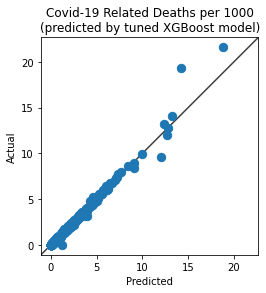

In [26]:
fig,ax = plt.subplots()
ax.scatter(x = (tuned_model.predict(X_test)), y = (y_test), s = 70)

lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
        ]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Covid-19 Related Deaths per 1000\n(predicted by tuned XGBoost model)")

Text(0.5, 1.0, 'Covid-19 Related Deaths per 1000\n(predicted by XGBoost model)')

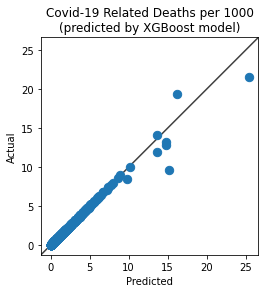

In [29]:
fig,ax = plt.subplots()
ax.scatter(x = (model.predict(X_test)), y = (y_test), s = 70)

lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
        ]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Covid-19 Related Deaths per 1000\n(predicted by XGBoost model)")